# Digging around the Baseball Databank

The Baseball Databank, along with other relevant open baseball datasets, are described and linked to <a href="http://chadwick-bureau.com/open-data/">at the Chadwick Baseball Bureau</a>, with the current version contained in the <a href="https://github.com/chadwickbureau/baseballdatabank">baseballdatabank git repository</a>. The easiest way to get the data on your machine locally is to clone or download the repository.  Once you have downloaded the data, you will find it contains two folders, 'core' and 'upstream'. The 'core' folder contains the databank itself, and 'upstream' contains files used to construct the databank. 

First, some preliminary imports and configuration, which you can execute in the cell below.

In [1]:
import pandas as pd
import numpy as np
import glob, os
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

%matplotlib inline

## Reading in BaseballDatabank csv files

__[Link to section in Cornell Virtual Workshop using this material](https://cvw.cac.cornell.edu/PyDataSci1/reading_dataframes#Reading_BaseballDatabank)__

First, let's examine the contents of the baseballdatabank/core directory.  The ```os.listdir``` function from the Python Standard Library provides a way to do this in a platform-independent manner.  Alternatively, the IPython/Jupyter ```%ls``` magic function is a little more convenient to use but requires a platform-specific syntax for pathnames.

In [2]:
import os
os.listdir('../data/baseballdatabank/core')

# alternatively, on Linux/Mac: %ls ../data/baseballdatabank/core
# or on Windows: %ls ..\data\baseballdatabank\core

['AwardsManagers.csv',
 'Managers.csv',
 'AwardsPlayers.csv',
 'Fielding.csv',
 'Salaries.csv',
 'Parks.csv',
 'Schools.csv',
 'People.csv',
 'PitchingPost.csv',
 'Teams.csv',
 'Appearances.csv',
 'AwardsSharePlayers.csv',
 'TeamsFranchises.csv',
 'Batting.csv',
 'ManagersHalf.csv',
 'FieldingOF.csv',
 'Pitching.csv',
 'CollegePlaying.csv',
 'HomeGames.csv',
 'HallOfFame.csv',
 'readme2014.txt',
 'AwardsShareManagers.csv',
 'BattingPost.csv',
 'TeamsHalf.csv',
 'SeriesPost.csv',
 'FieldingPost.csv',
 'AllstarFull.csv',
 'FieldingOFsplit.csv']

Now, let's define a function that will read all the baseballdatabank csv files into pandas dataframes.

In [3]:
def read_all_databank_core_csv(directory):
    """
    read all csv files in the specified baseball databank directory and
    populate a dictionary storing each of the tables keyed to its name
    """
    dfs = {}
    files = glob.glob('{}/*.csv'.format(directory))
    for f in files:
        d, name = os.path.split(f)
        table = os.path.splitext(name)[0]
        df = pd.read_csv(f)
        dfs[table] = df
    return dfs

bbdfs = read_all_databank_core_csv('../data/baseballdatabank/core')

# let's extract a few for further processing
batting = bbdfs['Batting']
pitching = bbdfs['Pitching']
teams = bbdfs['Teams']

## Taking a peek
### batting is year-by-year for each individual player


In [4]:
batting.head()

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,abercda01,1871,1,TRO,NaN,1,4,0,0,0,...,0.0,0.0,0.0,0,0.0,NaN,NaN,NaN,NaN,0.0
1,addybo01,1871,1,RC1,NaN,25,118,30,32,6,...,13.0,8.0,1.0,4,0.0,NaN,NaN,NaN,NaN,0.0
2,allisar01,1871,1,CL1,NaN,29,137,28,40,4,...,19.0,3.0,1.0,2,5.0,NaN,NaN,NaN,NaN,1.0
3,allisdo01,1871,1,WS3,NaN,27,133,28,44,10,...,27.0,1.0,1.0,0,2.0,NaN,NaN,NaN,NaN,0.0
4,ansonca01,1871,1,RC1,NaN,25,120,29,39,11,...,16.0,6.0,2.0,2,1.0,NaN,NaN,NaN,NaN,0.0


### teams is year-by-year for each team

In [5]:
teams.head()

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
0,1871,NaN,BS1,BNA,NaN,3,31,NaN,20,10,...,24,0.834,Boston Red Stockings,South End Grounds I,NaN,103,98,BOS,BS1,BS1
1,1871,NaN,CH1,CNA,NaN,2,28,NaN,19,9,...,16,0.829,Chicago White Stockings,Union Base-Ball Grounds,NaN,104,102,CHI,CH1,CH1
2,1871,NaN,CL1,CFC,NaN,8,29,NaN,10,19,...,15,0.818,Cleveland Forest Citys,National Association Grounds,NaN,96,100,CLE,CL1,CL1
3,1871,NaN,FW1,KEK,NaN,7,19,NaN,7,12,...,8,0.803,Fort Wayne Kekiongas,Hamilton Field,NaN,101,107,KEK,FW1,FW1
4,1871,NaN,NY2,NNA,NaN,5,33,NaN,16,17,...,14,0.840,New York Mutuals,Union Grounds (Brooklyn),NaN,90,88,NYU,NY2,NY2


In [6]:
batting.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105861 entries, 0 to 105860
Data columns (total 22 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   playerID  105861 non-null  object 
 1   yearID    105861 non-null  int64  
 2   stint     105861 non-null  int64  
 3   teamID    105861 non-null  object 
 4   lgID      105123 non-null  object 
 5   G         105861 non-null  int64  
 6   AB        105861 non-null  int64  
 7   R         105861 non-null  int64  
 8   H         105861 non-null  int64  
 9   2B        105861 non-null  int64  
 10  3B        105861 non-null  int64  
 11  HR        105861 non-null  int64  
 12  RBI       105105 non-null  float64
 13  SB        103493 non-null  float64
 14  CS        82320 non-null   float64
 15  BB        105861 non-null  int64  
 16  SO        103761 non-null  float64
 17  IBB       69210 non-null   float64
 18  HBP       103044 non-null  float64
 19  SH        99792 non-null   float64
 20  SF  

In [7]:
teams.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2895 entries, 0 to 2894
Data columns (total 48 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   yearID          2895 non-null   int64  
 1   lgID            2845 non-null   object 
 2   teamID          2895 non-null   object 
 3   franchID        2895 non-null   object 
 4   divID           1378 non-null   object 
 5   Rank            2895 non-null   int64  
 6   G               2895 non-null   int64  
 7   Ghome           2496 non-null   float64
 8   W               2895 non-null   int64  
 9   L               2895 non-null   int64  
 10  DivWin          1350 non-null   object 
 11  WCWin           714 non-null    object 
 12  LgWin           2867 non-null   object 
 13  WSWin           2538 non-null   object 
 14  R               2895 non-null   int64  
 15  AB              2895 non-null   int64  
 16  H               2895 non-null   int64  
 17  2B              2895 non-null   i

## Aggregate operations

NumPy and Pandas both provide aggregate mathematical operations that can be carried out over arrays and dataframes, respectively.

With the baseball batting dataframe, we might be interested in the total number of different types of hitting outcomes over the entire history of MLB baseball. We can easily compute this by summing all the rows (axis=0) of the batting dataframe.

In [8]:
batting.sum(axis=0)

playerID    abercda01addybo01allisar01allisdo01ansonca01ar...
yearID                                              208098938
stint                                                  114200
teamID      TRORC1CL1WS3RC1FW1RC1BS1FW1BS1CL1CL1WS3TROPH1T...
G                                                     5421601
AB                                                   14922240
R                                                     1978988
H                                                     3902204
2B                                                     663359
3B                                                     134642
HR                                                     300985
RBI                                               1.78347e+06
SB                                                     307454
CS                                                      99243
BB                                                    1375180
SO                                                 2.1351e+06
IBB     

In [9]:
batting.sum(axis=0, numeric_only=True)

yearID    208098938.0
stint        114200.0
G           5421601.0
AB         14922240.0
R           1978988.0
H           3902204.0
2B           663359.0
3B           134642.0
HR           300985.0
RBI         1783467.0
SB           307454.0
CS            99243.0
BB          1375180.0
SO          2135096.0
IBB           75168.0
HBP          109310.0
SH           224785.0
SF            72798.0
GIDP         236467.0
dtype: float64

In [10]:
print(batting['G'].mean())
print(batting['G'].std())

51.21433766920774
47.05759910431073


## Adding derived data: calculating singles (1B) from H,2B,3B,HR

__[Link to section in Cornell Virtual Workshop using this material](https://cvw.cac.cornell.edu/PyDataSci1/augmenting#derived)__

Sometimes, the dataset that we have access to doesn't contain all the related information that we might want. But we can augment the original dataset with additional data derived from the original. For example, the baseball batting dataset oddly does not contain information about the number of singles (i.e., one-base hits in which the batter reached first base safely and remained there until the next batter batted). In baseball, there are 4 kinds of hits: 
* singles (one base, or 1B)
* doubles (two bases, or 2B)
* triples (three bases, or 3B)
* homeruns (four bases, or HR)

Since the dataset contains information about the total number of hits H, as well as the number of 2B, 3B and HR, we can define an additional column in both the batting and teams dataframes to compute the number of singles (1B). Note the 1B data has been added as the last column.

In [11]:
batting['1B'] = batting['H'] - batting['2B'] - batting['3B'] - batting['HR']
teams['1B'] = teams['H'] - teams['2B'] - teams['3B'] - teams['HR']
batting.head()

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,1B
0,abercda01,1871,1,TRO,NaN,1,4,0,0,0,...,0.0,0.0,0,0.0,NaN,NaN,NaN,NaN,0.0,0
1,addybo01,1871,1,RC1,NaN,25,118,30,32,6,...,8.0,1.0,4,0.0,NaN,NaN,NaN,NaN,0.0,26
2,allisar01,1871,1,CL1,NaN,29,137,28,40,4,...,3.0,1.0,2,5.0,NaN,NaN,NaN,NaN,1.0,31
3,allisdo01,1871,1,WS3,NaN,27,133,28,44,10,...,1.0,1.0,0,2.0,NaN,NaN,NaN,NaN,0.0,30
4,ansonca01,1871,1,RC1,NaN,25,120,29,39,11,...,6.0,2.0,2,1.0,NaN,NaN,NaN,NaN,0.0,25


## Exercise: The Slash Line (BA / OBP / SLG)

__[Link to section in Cornell Virtual Workshop using this material](https://cvw.cac.cornell.edu/PyDataSci1/augmenting#morederived)__

Having added singles (1B) to the batting dataframe, we can add some more derived data, based upon relationships from the raw data:

* Batting Average (BA) represents the fraction of at bats (AB) that result in a hit of any type.
* On-Base Percentage (OBP) represents roughly the fraction of at bats that result in a batter getting on base through any means (a hit, a walk, or a hit-by-pitch (HBP)). This fraction is corrected somewhat by other factors, and the full formula is OBP = (Hits + Walks + Hit by Pitch) / (At Bats + Walks + Hit by Pitch + Sacrifice Flies).  See __[this link](https://www.baseball-reference.com/bullpen/On_base_percentage)__ for further information.
* Slugging Percentage (SLG) represents the ratio of the average number of bases achieved by a hitter per at-bat (thereby giving greater weight to hits that accrue more bases). 
* In modern day baseball statistics, this triplet of derived data (BA / OBP / SLG) is reported as the "slash line".
* In addition, the composite statistic On-Base-Plus-Slugging (OPS) &mdash; the sum of OBP and SLG &mdash; identifies those highly prized hitters who are both able to get on base effectively and generate extra-base hits, so we might as well add that stat too.
* It should be noted that even though OBP and SLG are referred to as "percentages", they are in fact reported textually as decimal fractions (typically rounded to three decimal places and without a leading integer part if the number is less than 1, e.g., .479).  Perhaps even more confusingly, they are spoken as the integers that would result from multiplying those three-digit decimals by 1000, e.g., a slugging percentage of .800 is spoken as "eight hundred".

<b>Instructions</b>: In the code cell below, augment the <code>batting</code> dataframe by adding four new columns, titled 'BA', 'OBP', 'SLG', and 'OPS', by implementing the appropriate calculation for each.  After doing so, have a look at the dataframe.  If you look at the head of the dataframe (<code>batting.head()</code>), you'll notice that OBP and OPS by these calculations are not well-defined in the early history of baseball, apparently because HBP was not kept track of and is missing from the dataframe.  If you peek at the tail of the dataframe (<code>batting.tail()</code>), you will see these quantities are computed for those players who had at least one AB.  If you're bothered by the missing HBP data, you could try filling in missing data with the <code>batting.fillna()</code> method.

In [12]:
# TO BE REMOVED
batting['BA']= batting['H'] / batting['AB']
batting['OBP'] = (batting['H']+batting['BB']+batting['HBP']) / (batting['AB']+batting['BB']+batting['HBP']+batting['SF'])
batting['SLG'] = (batting['1B']+2*batting['2B']+3*batting['3B']+4*batting['HR']) / batting['AB']
batting['OPS'] = (batting['OBP']+batting['SLG'])

END of Exercise: The Slash Line

## Groupby operations

__[Link to section in Cornell Virtual Workshop using this material](https://cvw.cac.cornell.edu/PyDataSci1/groupby)__

An extremely powerful set of capabilities is provided by the <code>groupby</code> method on dataframes, which provides support for <i>split-apply-combine</i> operations.  This means, for example, that we can:
<ul>
    <li><i>split</i> a dataframe into groups based on identity of a specified key or some other criterion
            <li><i>apply</i> an aggregating function across each of the subgroups, and then <li> <i>combine</i> the aggregated information back in a single dataframe.  
    </ul>
Each row in the <code>batting</code> dataframe contains information about a single player in a single year.  What if we wanted to know the totals of all of those statistics, on a year-by-year basis.  We can create a new dataframe by grouping by the <code>'yearID'</code> and then summing each of those year-by-year groups.

In [13]:
batting_by_year = batting.groupby('yearID').sum().reset_index()
batting_by_year.head()

,yearID,stint,G,AB,R,H,2B,3B,HR,RBI,...,IBB,HBP,SH,SF,GIDP,1B,BA,OBP,SLG,OPS
0,1871,115,2296,10822,2659,3101,434,239,47,1783.0,...,0.0,0.0,0.0,0.0,74.0,2381,29.245950,0.0,38.492023,0.0
1,1872,172,3305,15663,3390,4467,581,145,37,2132.0,...,0.0,0.0,0.0,0.0,97.0,3704,38.682199,0.0,45.930953,0.0
2,1873,128,3604,16959,3580,4926,570,211,47,2331.0,...,0.0,0.0,0.0,0.0,122.0,4098,31.441992,0.0,37.080007,0.0
3,1874,126,4199,19104,3470,5224,634,194,40,2252.0,...,0.0,0.0,0.0,0.0,107.0,4356,29.489962,0.0,34.913367,0.0
4,1875,248,6248,26833,4234,6812,839,273,40,2710.0,...,0.0,0.0,0.0,0.0,142.0,5660,47.556624,0.0,57.891005,0.0


Alternatively, instead of grouping by year, to get league-wide statistics for each year, we could group by player (playerID) to get career batting statistics for each player.  Alphabetically, the second player on this list (playerID: aaronha01) is Hank Aaron, one of the greatest players of all-time.  (His brother Tommy follows on the list.)

In [14]:
pl_bat = batting.groupby('playerID').sum().reset_index()
pl_bat.head()

,playerID,yearID,stint,G,AB,R,H,2B,3B,HR,...,IBB,HBP,SH,SF,GIDP,1B,BA,OBP,SLG,OPS
0,aardsda01,18084,9,331,4,0,0,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0,0.000000,0.000000,0.000000,0.000000
1,aaronha01,45195,23,3298,12364,2174,3771,624,98,755,...,293.0,32.0,21.0,121.0,328.0,2294,6.924731,8.552352,12.596811,21.149162
2,aaronto01,13768,7,437,944,102,216,42,6,13,...,3.0,0.0,9.0,6.0,36.0,155,1.544619,1.927765,2.085005,4.012770
3,aasedo01,25786,13,448,5,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0,0.000000,0.000000,0.000000,0.000000
4,abadan01,6010,3,15,21,1,2,0,0,0,...,0.0,0.0,0.0,0.0,1.0,2,0.117647,0.610526,0.117647,0.728173


As a technical aside, in both examples above, we chained several operations together in one expression, concluding each with the method <code>reset_index()</code>.  What is that operation for? Recall that the index of a dataframe is the group of labels for each row.  In the raw dataframes that we created when we read in the csv files, the index was simply an incrementing set of integers over each of the rows.  When we execute a groupby operation such as those above, a new dataframe is returned, and the index of that dataframe is the set of labels that we grouped on, e.g., the yearID's in the first example and the playerID's in the second example.  Sometimes it is useful to keep the groupby key as the index, but sometimes you might want to put the key back in as a regular column, and use incrementing integers as an index instead.  That's what the <code>reset_index()</code> method does.

**Note** that the "Slash Line" statistics that we added to the batting dataframe in the exercise above have not been correctly aggregated here in the <code>pl_bat</code> dataframe.  That is because those statistics are all averages of year-by-year counts.  A player's career batting average, however, is not the sum of his year-by-year batting averages (or even the mean of those averages).  Instead, career-wide Slash Line statistics would need to be recomputed based on the aggregate counts in the <code>pl_bat</code> dataframe, as in the code below.  Thus while a dataframe is easily extensible, we also need to keep in mind whether adding new types of data changes the semantics of the table.

In [15]:
# recompute Slash Line statistics for career batting 
pl_bat['BA'] = pl_bat['H'] / pl_bat['AB']
pl_bat['OBP'] = (pl_bat['H']+pl_bat['BB']+pl_bat['HBP']) / (pl_bat['AB']+pl_bat['BB']+pl_bat['HBP']+pl_bat['SF'])
pl_bat['SLG'] = (pl_bat['1B']+2*pl_bat['2B']+3*pl_bat['3B']+4*pl_bat['HR']) / pl_bat['AB']
pl_bat['OPS'] = (pl_bat['OBP']+pl_bat['SLG'])
pl_bat.head()

,playerID,yearID,stint,G,AB,R,H,2B,3B,HR,...,IBB,HBP,SH,SF,GIDP,1B,BA,OBP,SLG,OPS
0,aardsda01,18084,9,331,4,0,0,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0,0.000000,0.000000,0.000000,0.000000
1,aaronha01,45195,23,3298,12364,2174,3771,624,98,755,...,293.0,32.0,21.0,121.0,328.0,2294,0.304998,0.373949,0.554513,0.928462
2,aaronto01,13768,7,437,944,102,216,42,6,13,...,3.0,0.0,9.0,6.0,36.0,155,0.228814,0.291506,0.327331,0.618836
3,aasedo01,25786,13,448,5,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0,0.000000,0.000000,0.000000,0.000000
4,abadan01,6010,3,15,21,1,2,0,0,0,...,0.0,0.0,0.0,0.0,1.0,2,0.095238,0.240000,0.095238,0.335238


## Filtering data
### Top all-time slugging percentages (at least 100 AB)

__[Link to section in Cornell Virtual Workshop using this material](https://cvw.cac.cornell.edu/PyDataSci1/filtering_data)__

In [16]:
pl_bat[pl_bat.AB >= 100].sort_values(by='SLG', ascending=False).head(30)

,playerID,yearID,stint,G,AB,R,H,2B,3B,HR,...,IBB,HBP,SH,SF,GIDP,1B,BA,OBP,SLG,OPS
15251,ruthba01,42339,22,2503,8398,2174,2873,506,136,714,...,0.0,43.0,113.0,0.0,2.0,1517,0.342105,0.473960,0.689807,1.163767
18869,willite01,37057,19,2292,7706,1798,2654,525,71,521,...,86.0,39.0,5.0,20.0,197.0,1537,0.344407,0.481709,0.633792,1.115500
6189,gehrilo01,32827,17,2164,8001,1888,2721,534,163,493,...,0.0,45.0,106.0,0.0,2.0,1531,0.340082,0.447352,0.632421,1.079773
5743,foxxji01,40634,22,2317,8134,1751,2646,458,125,534,...,0.0,13.0,71.0,0.0,69.0,1529,0.325301,0.428274,0.609294,1.037568
1592,bondsba01,43923,22,2986,9847,2227,2935,601,77,762,...,688.0,106.0,4.0,91.0,165.0,1495,0.298060,0.444295,0.606885,1.051180
6740,greenha01,25201,13,1394,5193,1051,1628,379,71,331,...,0.0,16.0,35.0,0.0,66.0,847,0.313499,0.411813,0.605045,1.016858
922,bassjo01,5620,3,25,100,19,29,2,10,3,...,0.0,0.0,0.0,0.0,0.0,14,0.290000,0.310680,0.600000,0.910680
12986,ohearry01,2018,1,44,149,23,39,10,2,12,...,0.0,1.0,0.0,0.0,0.0,15,0.261745,0.352941,0.597315,0.950257
11429,mcgwima01,33893,18,1874,6187,1167,1626,252,6,583,...,150.0,75.0,3.0,78.0,147.0,785,0.262809,0.394149,0.588169,0.982318
14292,ramirma02,42056,23,2302,8244,1544,2574,547,20,555,...,216.0,109.0,2.0,90.0,243.0,1452,0.312227,0.410561,0.585395,0.995956


## A brief visual history of hitting in baseball

__[Link to section in Cornell Virtual Workshop using this material](https://cvw.cac.cornell.edu/PyDataSci1/history_baseball)__

We can use visualization tools in seaborn (sns) to summarize the entire history of hitting (batting) in baseball. We are specifically interested here not only in the 4 types of hits, but also some other key batting outcomes: strikeouts (SO) and bases-on-balls (BB), otherwise known as walks, as well as runs scored (R) and runs batting in (RBI).

The dataframe <code>batting_by_year</code> that we created above by computing totals per year is useful for some analyses, but is also confounded by the fact that MLB baseball has grown over time, both in terms of the number of teams in the league and the number of games played in a season.  Thus, per-year totals have grown over time partly due to the simple fact that the number of overall games played per season has increased.  Below we will create a new dataframe that accounts for this effect, by computing batting statistics on a per at-bat (AB) basis.

A PairGrid is used to plot the relationship between all sets of pairs of hitting variables (hit_vars), with which we can overlay with additional color information indicating the year (hue='yearID') to present a succinct history of hitting in baseball. In order to better see the progression of time in this visualization, it is useful to bin the year-by-year data into decades, which we can do by adding a new column to the dataframe (decade) that computes this using the <code>np.floor_divide</code> on each row.  Time progresses from light to dark blue in these plots.

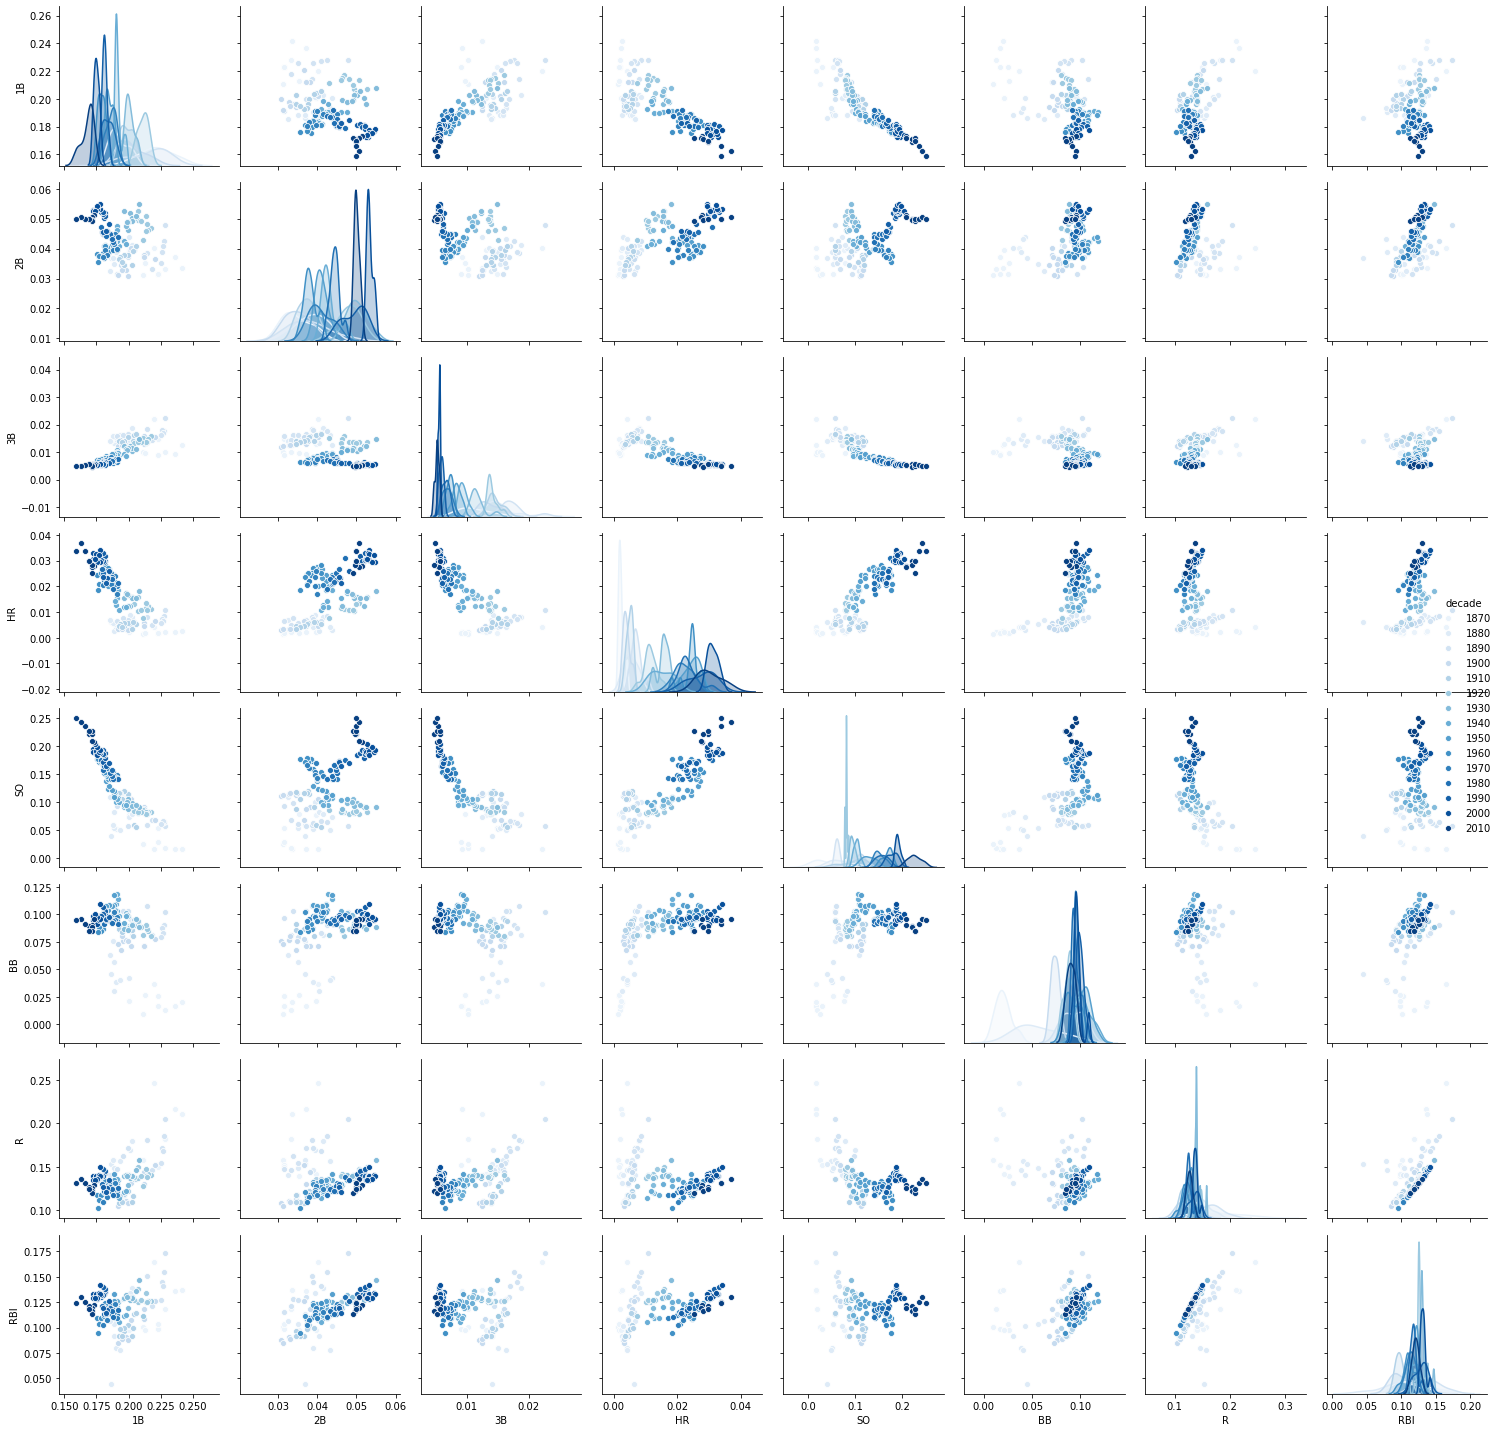

In [17]:
batting_per_AB_by_year = batting_by_year.copy()
for col in batting_per_AB_by_year.columns:
    if col in ['yearID', 'stint', 'G', 'AB']:
        continue
    batting_per_AB_by_year[col] = batting_per_AB_by_year[col]/batting_per_AB_by_year['AB']

batting_per_AB_by_year['decade'] = np.floor_divide(batting_per_AB_by_year['yearID'],10)*10

hit_vars = ('1B', '2B', '3B', 'HR', 'SO', 'BB', 'R', 'RBI')

pg = sns.pairplot(batting_per_AB_by_year, vars=hit_vars, hue='decade', palette='Blues')
plt.tight_layout()
#plt.savefig("../data/batting_scatterplot_matrix.png")

## The correlation of hitting statistics

We can summarize the pairwise correlations among hitting outcomes embedded in the scatterplot data above by using the <code>corr()</code> method on the dataframe, and then displaying all the correlation values with a heatmap.

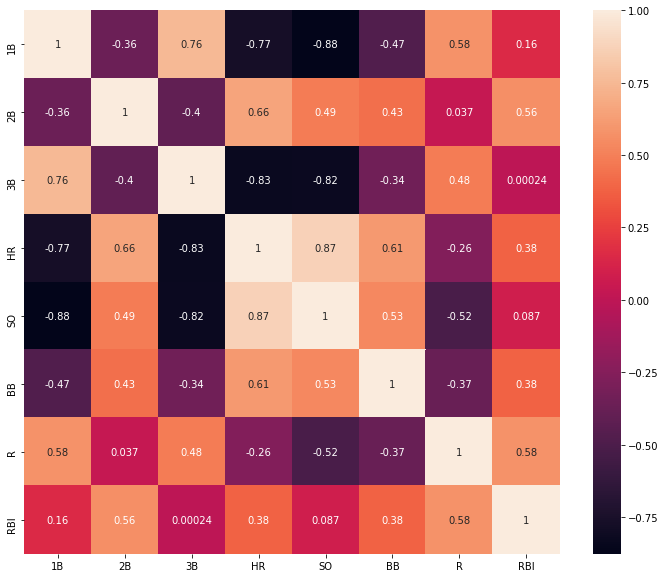

In [18]:
plt.figure(figsize = (12,10))
sns.heatmap(batting_per_AB_by_year[list(hit_vars)].corr(), annot=True)
#plt.savefig("../data/batting_correlation_matrix.png")

## The interoperation of SQLAlchemy and Pandas

__[Link to section in Cornell Virtual Workshop using this material](https://cvw.cac.cornell.edu/PyDataSci1/dataframes_sql)__

<b>Note:</b> running the code cell below will generate a file in the code directory named 'bbdb.sqlite', which will be approximately 34 MB in size.

In [19]:
def write_all_tables_to_sqlite(dfs, sql_filename):
    engine = create_engine('sqlite:///{}'.format(sql_filename))
    for table, df in dfs.items():
        df.to_sql(table, con=engine, index=False)
    engine.dispose()
    
sqlite_filename = 'bbdb.sqlite'
try:
    os.remove(sqlite_filename)
except FileNotFoundError:
    pass
write_all_tables_to_sqlite(bbdfs, sqlite_filename)

## Making an SQL query to Baseball DB

With all the data in a SQLite database, we can now connect to it and issue SQL queries to extract information of interest.  For example, we can identify which players had the most hits in a season.

In [20]:
engine = create_engine('sqlite:///bbdb.sqlite')
most_hits_in_a_year = \
    pd.read_sql_query('select * from batting order by H desc limit 10', engine)
most_hits_in_a_year

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,IBB,HBP,SH,SF,GIDP,1B,BA,OBP,SLG,OPS
0,suzukic01,2004,1,SEA,AL,161,704,101,262,24,...,19.0,4.0,2.0,3.0,6.0,225,0.372159,0.414474,0.454545,0.869019
1,sislege01,1920,1,SLA,AL,154,631,137,257,49,...,NaN,2.0,13.0,NaN,NaN,171,0.407290,NaN,0.632330,NaN
2,odoulle01,1929,1,PHI,NL,154,638,152,254,35,...,NaN,4.0,13.0,NaN,NaN,181,0.398119,NaN,0.622257,NaN
3,terrybi01,1930,1,NY1,NL,154,633,139,254,39,...,NaN,1.0,19.0,NaN,NaN,177,0.401264,NaN,0.619273,NaN
4,simmoal01,1925,1,PHA,AL,153,654,122,253,43,...,NaN,1.0,6.0,NaN,NaN,174,0.386850,NaN,0.599388,NaN
5,hornsro01,1922,1,SLN,NL,154,623,141,250,46,...,NaN,1.0,15.0,NaN,NaN,148,0.401284,NaN,0.722311,NaN
6,kleinch01,1930,1,PHI,NL,156,648,158,250,59,...,NaN,4.0,13.0,NaN,NaN,143,0.385802,NaN,0.686728,NaN
7,cobbty01,1911,1,DET,AL,146,591,147,248,47,...,NaN,8.0,11.0,NaN,NaN,169,0.419628,NaN,0.620981,NaN
8,sislege01,1922,1,SLA,AL,142,586,134,246,42,...,NaN,3.0,16.0,NaN,NaN,178,0.419795,NaN,0.593857,NaN
9,suzukic01,2001,1,SEA,AL,157,692,127,242,34,...,10.0,8.0,4.0,4.0,3.0,192,0.349711,0.381471,0.456647,0.838119


If you're a baseball fan, maybe you already knew that Ichiro Suzuki (playerID suzukic01) currently holds the record for most hits in a season (262 hits in 2004), having topped George Sisler's long-standing record (257 hits in 1920).  But if you're curious about the names attached to the somewhat obscure playerIDs stored in the batting table, you could issue a more complicated SQL query using a table join to extract the players names from the people table (using Python's triple quotes to create a multiline string to accommodate the long query):

In [21]:
pd.read_sql_query("""select people.nameFirst, people.nameLast, batting.playerID, batting.yearID, batting.H
from people join batting on people.playerID=batting.playerID order by batting.H desc limit 10""", engine) 

,nameFirst,nameLast,playerID,yearID,H
0,Ichiro,Suzuki,suzukic01,2004,262
1,George,Sisler,sislege01,1920,257
2,Lefty,O'Doul,odoulle01,1929,254
3,Bill,Terry,terrybi01,1930,254
4,Al,Simmons,simmoal01,1925,253
5,Rogers,Hornsby,hornsro01,1922,250
6,Chuck,Klein,kleinch01,1930,250
7,Ty,Cobb,cobbty01,1911,248
8,George,Sisler,sislege01,1922,246
9,Ichiro,Suzuki,suzukic01,2001,242


## More baseball history: the saga of home runs

For many baseball fans, the most exciting part of the sport is the home runs.  From our earlier hitting scatterplot, we saw that the rate of home runs has increased steadily over time.  We can examine this in a bit more detail by plotting the rate of HR per AB over time, using the plot method on the batting_per_AB_by_year.  The code block below also includes some annotations relevant to the history of home runs in baseball (and for more information about how baseball was transformed in the 1950s, read https://tht.fangraphs.com/dig_the_1950s/ ). MLB baseball in 2019 is on a pace to obliterate the newly-set 2018 record for most home runs in a season, and many are debating how to try to keep the game from devolving into and endless series of walks, strikeouts and home runs.

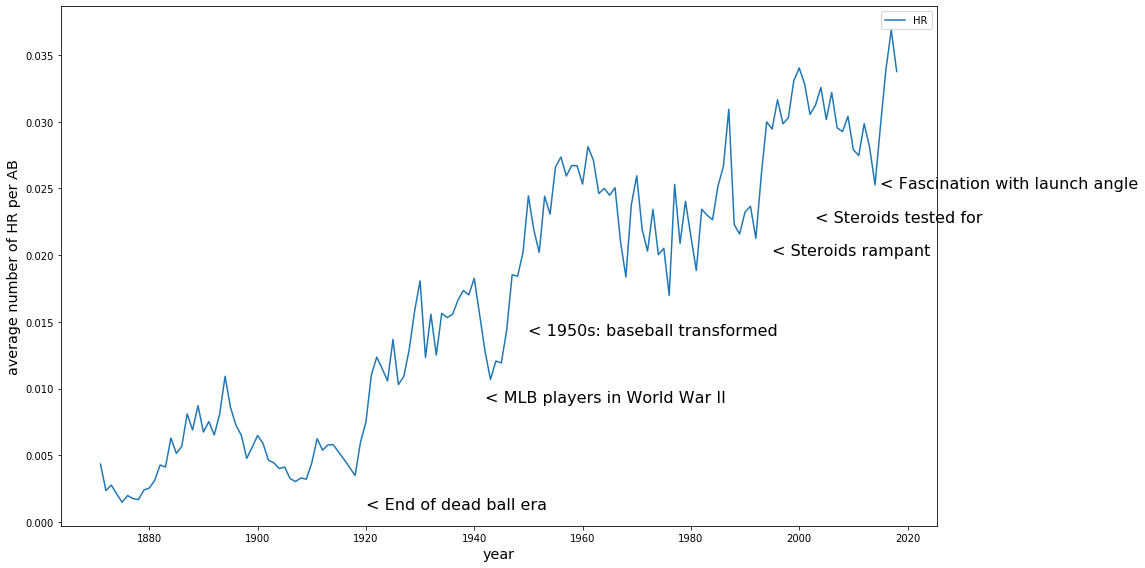

In [22]:
ax = batting_per_AB_by_year.plot('yearID', 'HR', figsize=(16,8))
annot1920 = plt.text(1920, 0.001, '< End of dead ball era', fontsize=16)
annot1942 = plt.text(1942, 0.009, '< MLB players in World War II', fontsize=16)
annot1950 = plt.text(1950, 0.014, '< 1950s: baseball transformed', fontsize=16)
annot1995 = plt.text(1995, 0.020, '< Steroids rampant', fontsize=16)
annot2003 = plt.text(2003, 0.0225, '< Steroids tested for', fontsize=16)
annot2015 = plt.text(2015, 0.025, '< Fascination with launch angle', fontsize=16)
plt.xlabel('year', fontsize='x-large')
plt.ylabel('average number of HR per AB', fontsize='x-large')
plt.tight_layout()
#plt.savefig('../data/history_of_homeruns.png')